In [9]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt

from PIL import Image

from datasets import ImageDataset
from itti import SaliencyMap
from mdc import MDCSaliency

##### 数据加载

In [10]:
root = '/data/SALICON'
dataset = ImageDataset(root)

/home/xieshaoyuan/anaconda3/envs/pointnet/lib/python3.6/site-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


图片示例

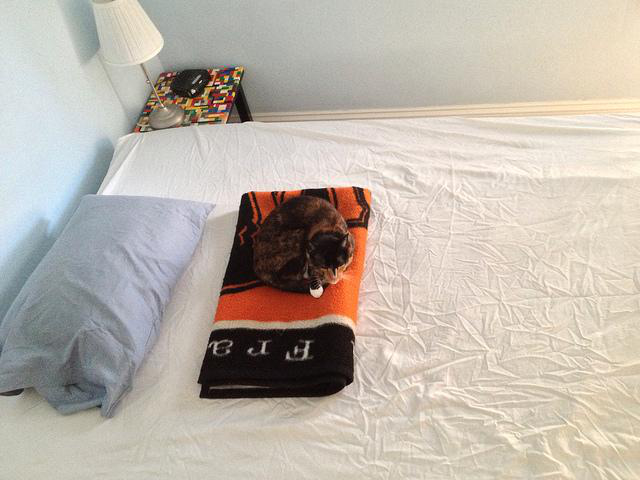

In [11]:
img, map = dataset[100]
img

##### 计算显著图
使用ITTI算法

In [19]:
saliency = SaliencyMap(np.asarray(img))

In [20]:
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i in range(len(imgs)):
        axs[0, i].imshow(imgs[i])
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

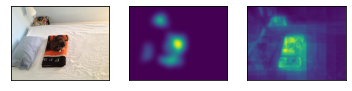

In [21]:
imgs = [img, map, Image.fromarray(np.uint8(255 * saliency.map))]
show(imgs)

计算MDC算法

In [22]:
img_ = cv.cvtColor(np.asarray(img),cv.COLOR_RGB2BGR) 
saliency = MDCSaliency(img_)

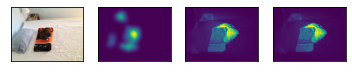

In [23]:
imgs = [img, map, Image.fromarray(np.uint8(saliency.original_map)), Image.fromarray(np.uint8(saliency.aug_map))]
show(imgs)